Nathan Mohapatra

njmohapatra@ucdavis.edu

# Activity-1:
## Write your verification of rule (3) using the residual matrix (A) and discuss it on the discussion forum.

$3)\ A^T *A=\Sigma_i a^2_i$

$A=
\begin{bmatrix}
y^{(1)}-w^T x^{(1)}\\
y^{(2)}-w^T x^{(2)}\\
...\\
y^{(m)}-w^T x^{(m)}
\end{bmatrix}
=(Y-Xw)$

$(Y-Xw)^T (Y-Xw)=
\begin{bmatrix}
y^{(1)}-w^T x^{(1)} & y^{(2)}-w^T x^{(2)} & ... & y^{(m)}-w^T x^{(m)}
\end{bmatrix}
\begin{bmatrix}
y^{(1)}-w^T x^{(1)}\\
y^{(2)}-w^T x^{(2)}\\
...\\
y^{(m)}-w^T x^{(m)}
\end{bmatrix}
=\sum\limits_{i=1}^m (y^{(i)}-w^T x^i)^2$

$A^T *A=\Sigma_i a^2_i$ 
$\checkmark$

# Activity-2:
## Prove [OLS Solution to Minimize RSS for LR] mathematically.

$RSS=
\sum\limits_{i=1}^m (y^{(i)}-w^T x^i)^2
=(Y-Xw)^T (Y-Xw)$

$\frac{\delta RSS}{\delta w}=0$

$\nabla_w[(Y-Xw)^T (Y-Xw)]=0$

$\nabla_w(Y^T Y-2w^T X^T Y+w^T X^T Xw)=0$

$-2X^T Y+2X^T Xw=0$

$-2X^T(Y-Xw)=0$

$2X^T Xw=2X^T Y$

$w(X^T X)=X^T Y$

$w=(X^T X)^{-1}X^T Y = \frac{X^T Y}{X^T X}$
$\checkmark$

# Activity-3:
## Stochastic GD
## Create the log table containing these columns and fill out the table for 1 epoch for the dataset provided in the example below. Write your Python code to generate the output.

In [1]:
import pandas as pd

# Initialize data
X1 = [4,2,1,3,1,6]
X2 = [1,8,0,2,4,7]
Y = [2,-14,1,-1,-7,-8]

# Lists for table
y_hat_list = []
loss_list = []
error_list = []
w1_list = []
w2_list = []
b_list = []

# Initialize weights (one-time)
w1 = -0.017
w2 = -0.048
b = 0

# Iterate through 6 batches (batch size = 1)
for i in range(6):
    w1_list.append(round(w1, 3))
    w2_list.append(round(w2, 3))
    b_list.append(round(b, 3))
    
    # Feed batch data
    x1 = X1[i]
    x2 = X2[i]
    y = Y[i]
    
    # Compute y_hat
    y_hat = w1 * x1 + w2 * x2 + b
    y_hat_list.append(round(y_hat, 3))
    
    # Compute loss
    error = y_hat - y
    error_list.append(round(error, 3))
    loss = error ** 2
    loss_list.append(round(loss, 2))
    
    # Backpropagation
    # Compute partial differentials
    L_y_hat = 2 * error
    y_hat_b = 1
    y_hat_w1 = x1
    y_hat_w2 = x2
    
    # Update weights (learning rate = 0.05)
    b = b - 0.05 * (L_y_hat * y_hat_b)
    w1 = w1 - 0.05 * (L_y_hat * y_hat_w1)
    w2 = w2 - 0.05 * (L_y_hat * y_hat_w2)

# Create data and output table
d = {"x1" : X1, "x2" : X2, "y" : Y, "y_hat" : y_hat_list, "loss" : loss_list,
        "y-y_hat" : error_list, "w1" : w1_list, "w2" : w2_list, "b" : b_list}
df = pd.DataFrame(d)
print(df)

   x1  x2   y   y_hat     loss  y-y_hat     w1      w2      b
0   4   1   2  -0.116     4.48   -2.116 -0.017  -0.048  0.000
1   2   8 -14   3.179   295.12   17.179  0.829   0.164  0.212
2   1   0   1  -4.113    26.14   -5.113 -2.606 -13.580 -1.506
3   3   2  -1 -34.440  1118.24  -33.440 -2.095 -13.580 -0.995
4   1   4  -7 -17.281   105.70  -10.281  7.937  -6.892  2.349
5   6   7  -8  37.712  2089.58   45.712  8.965  -2.779  3.377


## Next, visualize the loss for epoch 1 using a line chart. For this task, you can use matplotlib library.

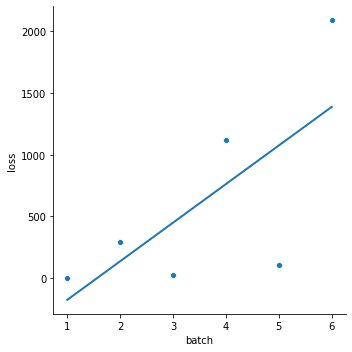

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression

# Create data
batch_list = [1,2,3,4,5,6]
d = {"batch" : batch_list, "loss" : loss_list}
df = pd.DataFrame(d)

# Calculate line of best fit
x = df.iloc[:,0].to_numpy().reshape(-1, 1)
y = df.iloc[:,1].to_numpy()
reg = LinearRegression().fit(x, y)

# Plot line of best fit
sb.relplot(x="batch", y="loss", data=df)
xlims = [np.amin(x), np.amax(x)]
plt.plot(xlims, reg.intercept_ + reg.coef_ * xlims, linewidth=2)